In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#testing with time
df = pd.read_csv("../training_sets_nudge/output1_1.csv")

features = df.columns

n = len(df)
label_df = []
data_df = df.iloc[:-1]

#TODO: change index of temp_df to start from 0
temp_df = df['x'].iloc[1:]

for i in range(n-1):
    if data_df['x'][i] < temp_df.get(i+1):
        label_df.insert(i, 1) #right 
    else:
        label_df.insert(i, 0) #left

X = data_df
y = np.array(label_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=50)
features = X_train.columns


In [ ]:
import shap
shap.initjs()
X_train_summary = shap.kmeans(X_train, 10)

In [30]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
#single prediction
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_test.iloc[0, :])

shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0, :])

100%|██████████| 600/600 [00:01<00:00, 358.08it/s]


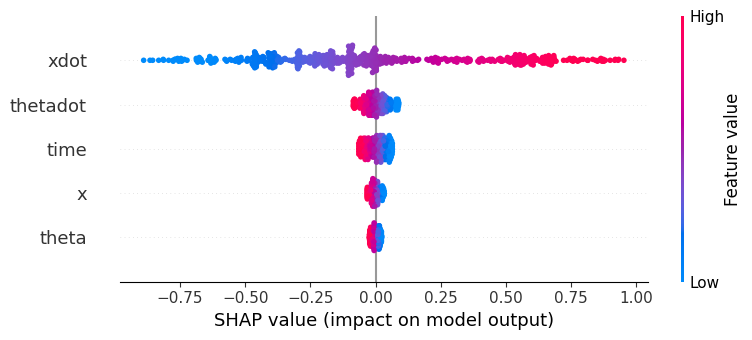

In [32]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

100%|██████████| 600/600 [00:01<00:00, 349.87it/s]


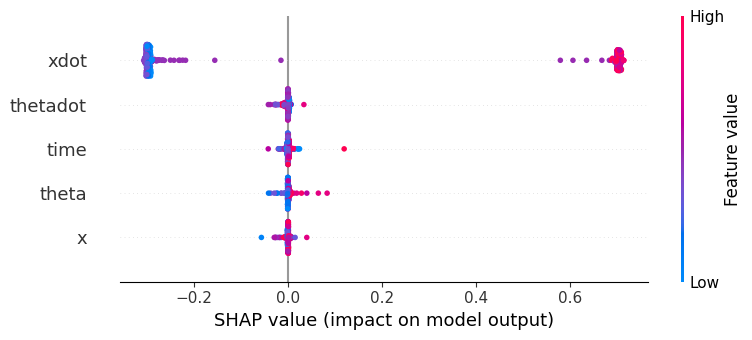

In [33]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(solver="lbfgs", alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)